In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import sys

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

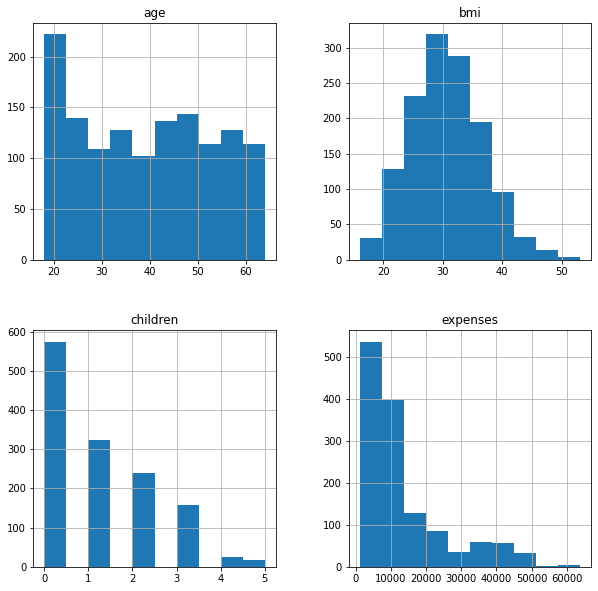

In [ ]:
dataset.hist(figsize=(10,10))
plt.show()

In [ ]:
continuous_cols = [col for col in dataset.columns if dataset[col].nunique()>15]
print(continuous_cols)

['age', 'bmi', 'expenses']


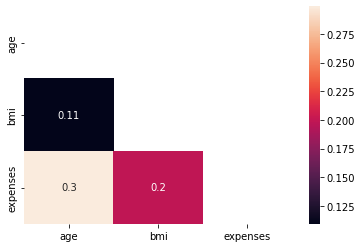

In [ ]:
matrix = dataset[continuous_cols].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix,mask=mask,annot=True)

['age', 'bmi', 'children', 'expenses']
['sex', 'smoker', 'region']


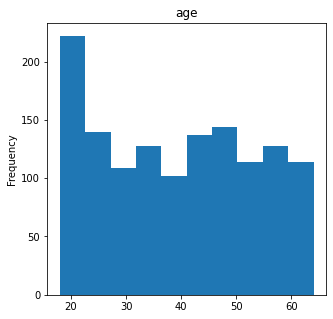

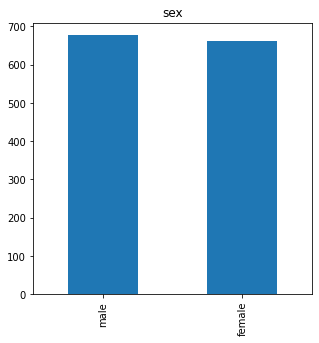

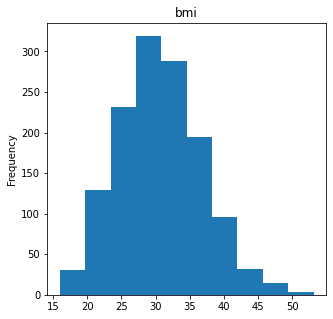

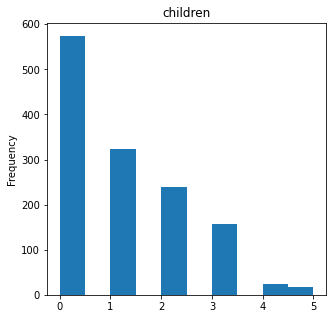

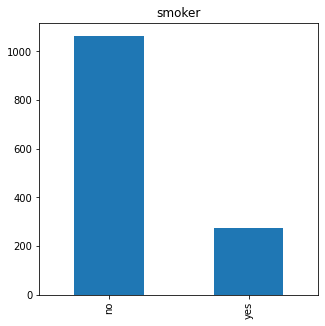

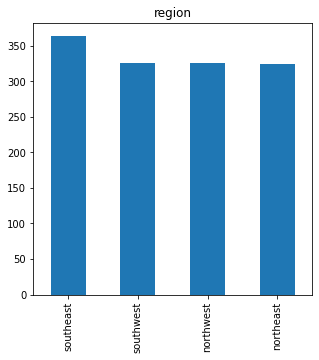

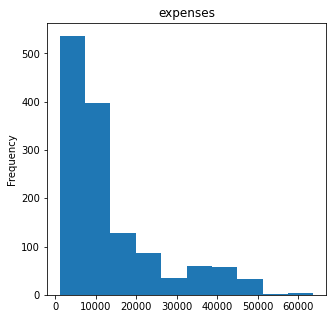

In [ ]:
num_lst = []
cat_lst = []

from pandas.api.types import is_string_dtype, is_numeric_dtype

for column in dataset:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(dataset[column]):
        dataset[column].plot(kind = 'hist')
        num_lst.append(column)
    elif is_string_dtype(dataset[column]):
        dataset[column].value_counts().plot(kind = 'bar')
        cat_lst.append(column)

print(num_lst)
print(cat_lst)

In [ ]:
print(dataset.isnull().sum().sum())

0


In [ ]:
X = dataset.iloc[:, :-1].values #returns all rows and first column
y = dataset.iloc [:, -1].values #returns all rows and last column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 4] = le.fit_transform(X[:, 4])

np.set_printoptions(threshold=sys.maxsize)
print(X[:5,:10])

[[19 0 27.9 0 1 'southwest']
 [18 1 33.8 1 0 'southeast']
 [28 1 33.0 3 0 'southeast']
 [33 1 22.7 0 0 'northwest']
 [32 1 28.9 0 0 'northwest']]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

np.set_printoptions(threshold=sys.maxsize)
print(X[:5,:10])

[[0.0 0.0 0.0 1.0 19 0 27.9 0 1]
 [0.0 0.0 1.0 0.0 18 1 33.8 1 0]
 [0.0 0.0 1.0 0.0 28 1 33.0 3 0]
 [0.0 1.0 0.0 0.0 33 1 22.7 0 0]
 [0.0 1.0 0.0 0.0 32 1 28.9 0 0]]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly,train_y)

LinearRegression()

In [ ]:
y_pred = model.predict(poly_reg.fit_transform(test_X))

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_y.reshape(len(test_y),1)),1)[:10])

[[11272.56  9724.53]
 [10506.09  8547.69]
 [53219.72 45702.02]
 [14769.66 12950.07]
 [ 9841.19  9644.25]
 [ 7463.28  4500.34]
 [ 2659.41  2198.19]
 [15294.25 11436.74]
 [10877.34  7537.16]
 [ 8157.22  5425.02]]


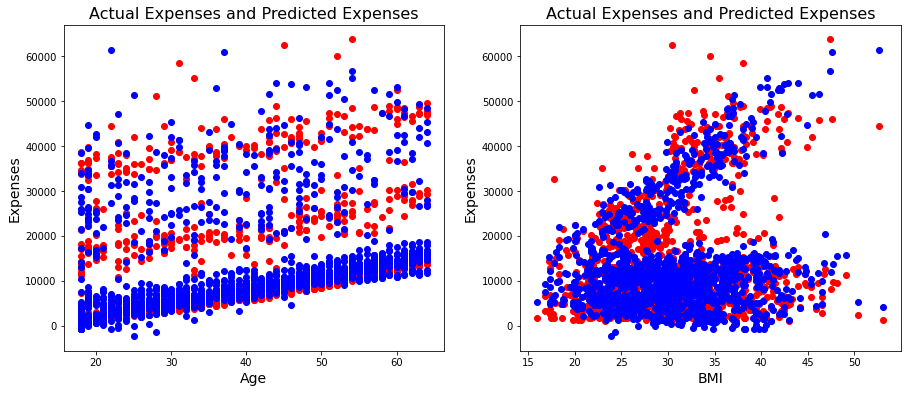

In [ ]:
plt.subplots(figsize=(15,6))

# Age vs Expenses
plt.subplot(1,2,1)
plt.scatter(dataset['age'], y, color = 'red')
plt.scatter(dataset['age'], model.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Expenses',fontsize = 14)

# BMI vs Expenses
plt.subplot(1,2,2)
plt.scatter(dataset['bmi'], y, color = 'red')
plt.scatter(dataset['bmi'], model.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Actual Expenses and Predicted Expenses', fontsize = 16)
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Expenses',fontsize = 14)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE : ",mean_squared_error(y_pred,test_y))
print("MAE : ",mean_absolute_error(y_pred,test_y))
print("R Score :",r2_score(y_pred,test_y))


MSE :  22144982.779551953
MAE :  3241.9742210820896
R Score : 0.843442762986933


In [ ]:
import seaborn as sns

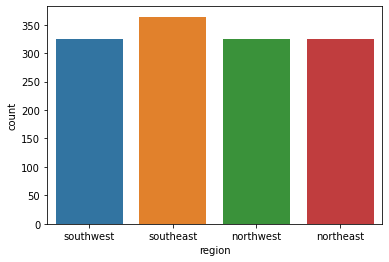

In [ ]:
sns.countplot(x='region',data=dataset)

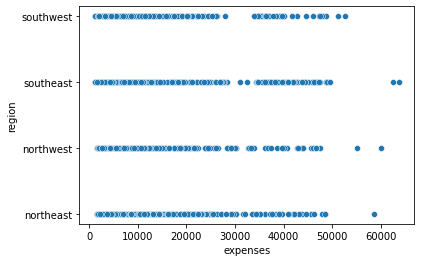

In [ ]:
sns.scatterplot(data=dataset, x="expenses", y="region")

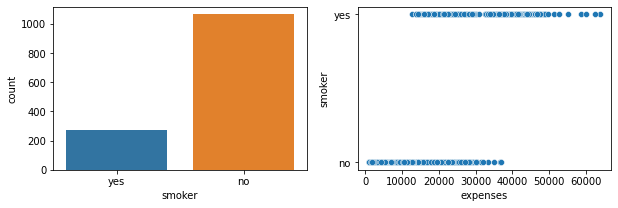

In [ ]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.countplot(x='smoker',data=dataset)
f.add_subplot(122)
sns.scatterplot(data=dataset, x="expenses", y="smoker")

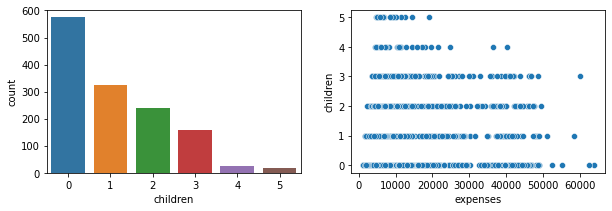

In [ ]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.countplot(x='children',data=dataset)
f.add_subplot(122)
sns.scatterplot(data=dataset, x="expenses", y="children")

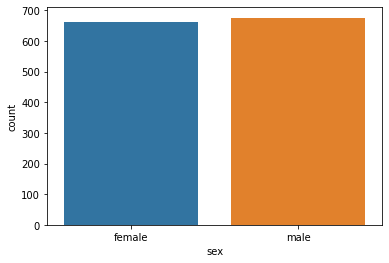

In [ ]:
plt.subplot(1,1,1)
sns.countplot(x='sex',data=dataset)

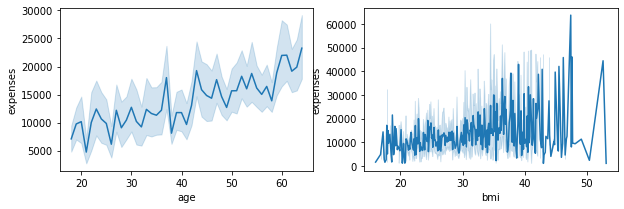

In [ ]:
f = plt.figure(figsize=(10,3))
f.add_subplot(121)
sns.lineplot(x='age',y='expenses',data=dataset)
f.add_subplot(122)
sns.lineplot(x='bmi',y='expenses',data=dataset)

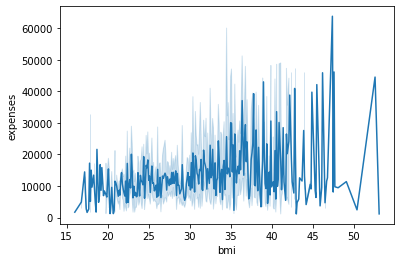

In [ ]:
sns.lineplot(x='bmi',y='expenses',data=dataset)

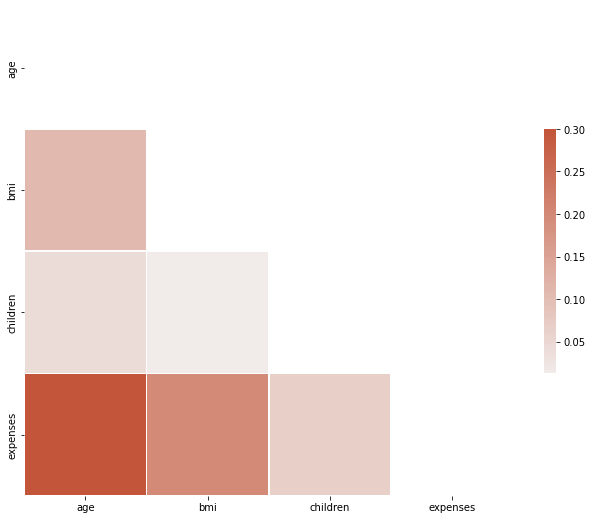

In [ ]:
import matplotlib.pyplot as plt
corr = dataset.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

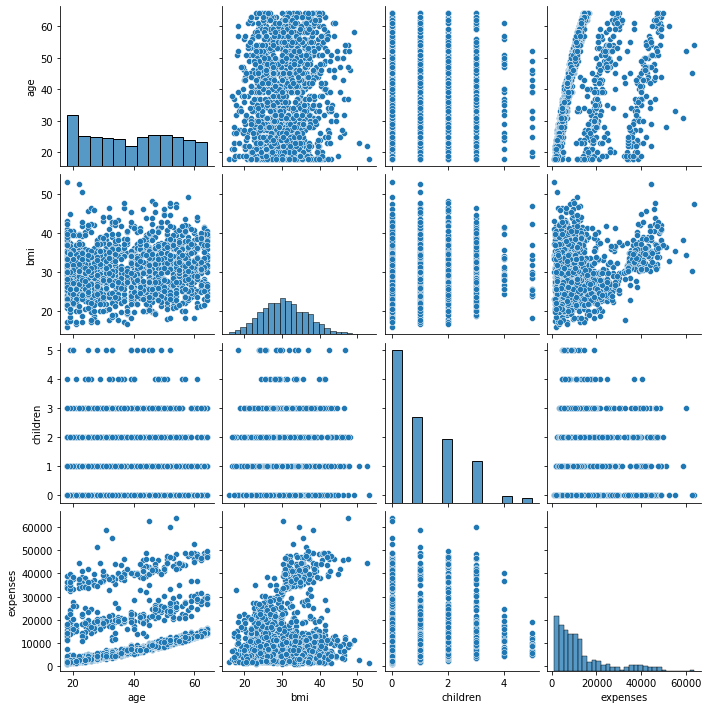

In [ ]:
sns.pairplot(dataset)

In [ ]:
X = dataset[['bmi','age','smoker','children']]
Y = dataset['expenses']

In [ ]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.25)

In [ ]:
%matplotlib inline

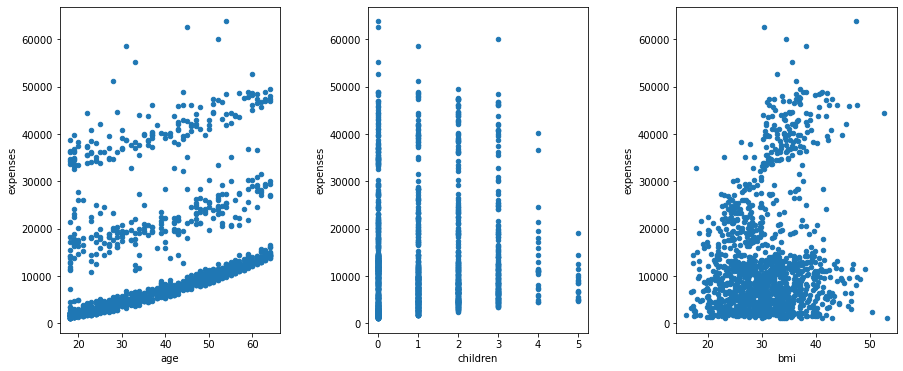

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
dataset.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
dataset.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
dataset.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

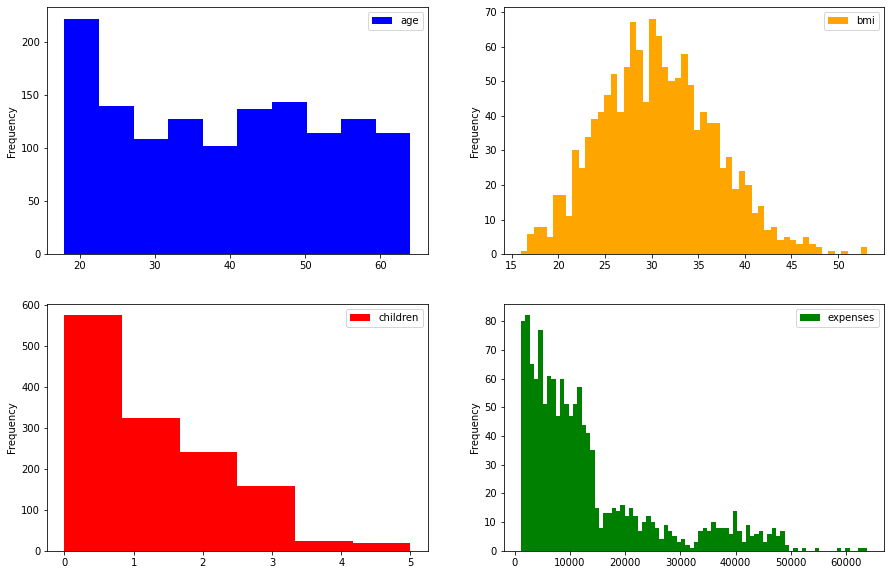

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

dataset.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue')
dataset.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
dataset.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6)
dataset.plot(kind='hist', y='expenses', ax=axes[1][1], color = 'green', bins = 80)

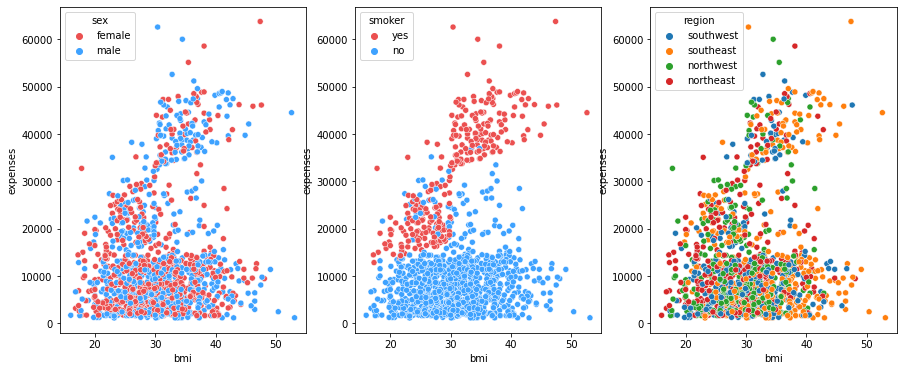

In [ ]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=dataset,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=dataset,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=dataset,hue='region')

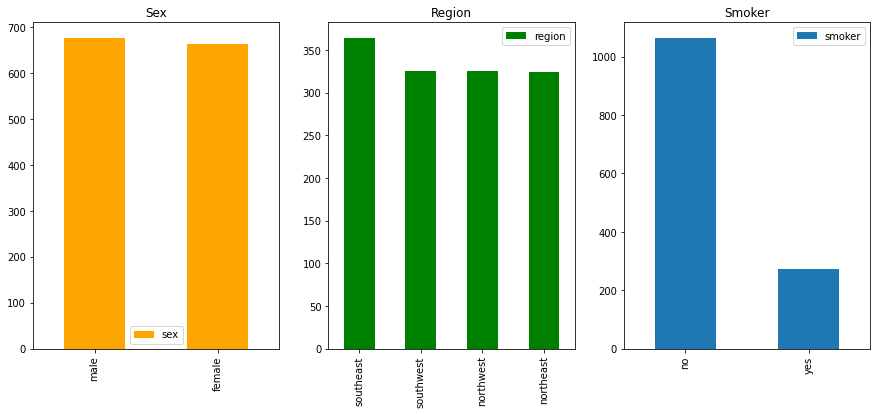

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
dataset['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex')
dataset['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
dataset['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

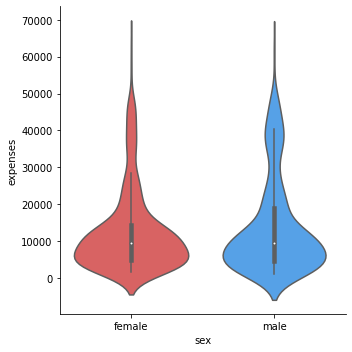

In [ ]:
palette=['#EB5050','#3EA2FF']
sns.catplot(x='sex', y='expenses', kind='violin', palette=palette, data=dataset)

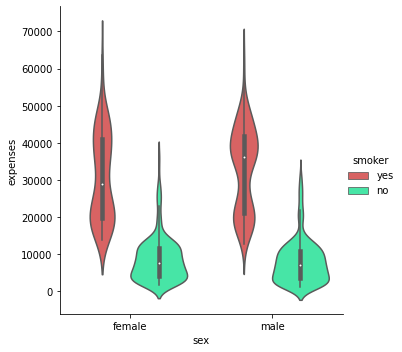

In [ ]:
palette=['#EB5050','#2DFFAB']
sns.catplot(x='sex', y='expenses', kind='violin', hue='smoker', palette=palette, data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of expenses')

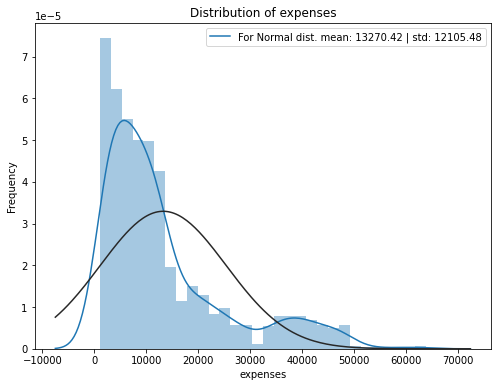

In [ ]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(dataset['expenses'], fit=norm)
(mu,sigma)= norm.fit(dataset['expenses'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of expenses')

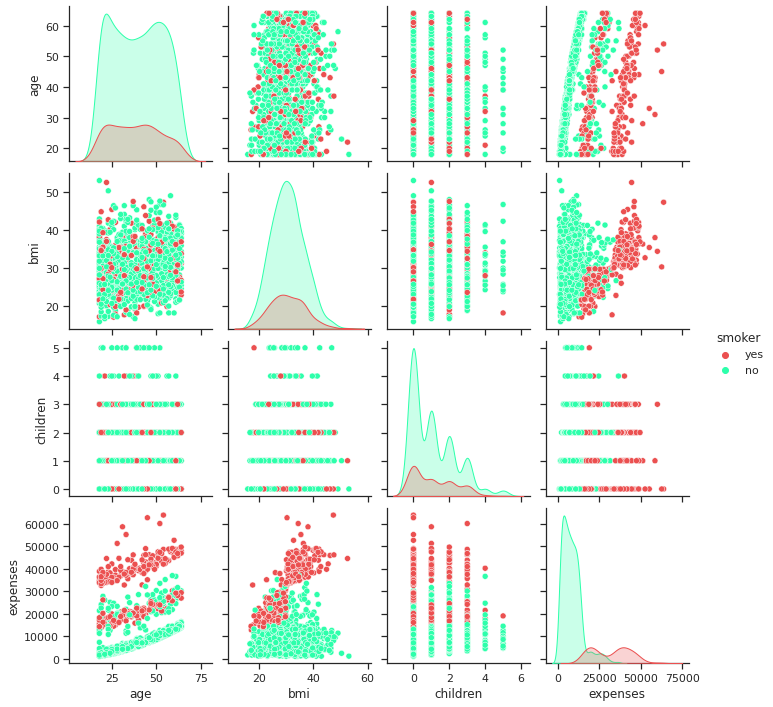

In [ ]:
palette=['#EB5050','#2DFFAB']
sns.set(style="ticks")
sns.pairplot(data=dataset, hue='smoker', palette=palette)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# Changing binary categories to 1s and 0s
dataset['sex'] = dataset['sex'].map(lambda s :1  if s == 'female' else 0)
dataset['smoker'] = dataset['smoker'].map(lambda s :1  if s == 'yes' else 0)
dataset.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,0,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [ ]:
X = dataset.drop(['expenses'], axis = 1)
y = dataset.expenses
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)


Shape of X:  (1338, 5)
Shape of y:  (1338,)


In [ ]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Number of children vs expenses')

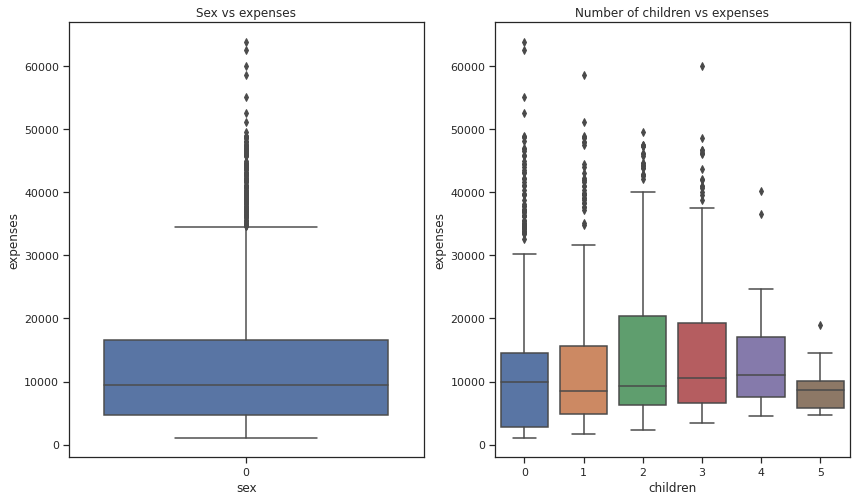

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.boxplot(x = 'sex',y='expenses', data = dataset, ax=ax[0])
ax[0].set_title('Sex vs expenses')
sns.boxplot(x = 'children',y='expenses', data = dataset, ax=ax[1])
ax[1].set_title('Number of children vs expenses')

GRAPHICALLY EXPLORING THE CORRELATION BETWEEN DIFFERENT FEATURES WITH MEDICAL EXPENSES VIA REGRESSION PLOTS

Text(0.5, 1.0, 'Number of Children vs expenses')

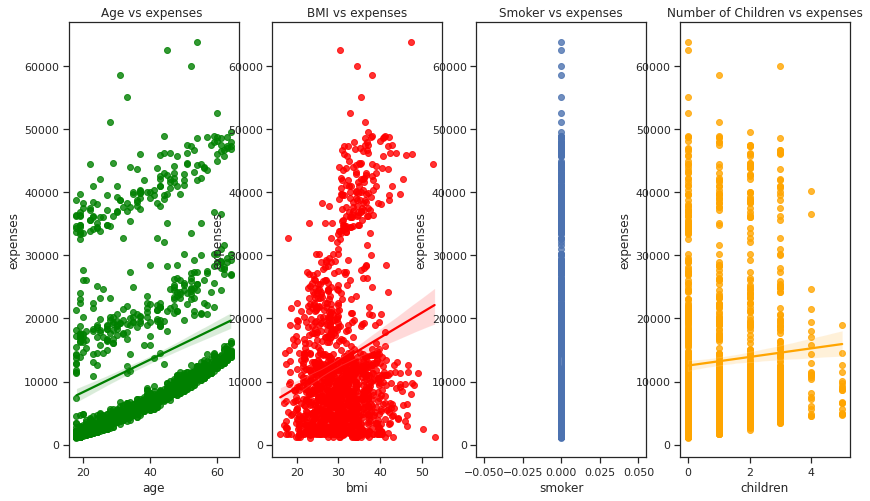

In [ ]:
fig1, ax1 = plt.subplots(1,4, figsize=(14,8))
sns.regplot(x = 'age',y='expenses', data = dataset, ax=ax1[0],color='green')
ax1[0].set_title('Age vs expenses ')
sns.regplot(x = 'bmi',y='expenses', data = dataset, ax=ax1[1],color='red')
ax1[1].set_title('BMI vs expenses')
sns.regplot(x = 'smoker',y='expenses', data = dataset, ax=ax1[2])
ax1[2].set_title('Smoker vs expenses')
sns.regplot(x = 'children',y='expenses', data = dataset, ax=ax1[3],color='orange')
ax1[3].set_title('Number of Children vs expenses')

In [ ]:
import xgboost as xgb
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]

In [ ]:
df = dataset

In [ ]:
dff=df

In [ ]:
dff['sex']=dff['sex'].apply(lambda x:1 if x=='male' else 0)

In [ ]:
dff

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


In [ ]:
dff.corr()['expenses'].sort_values(ascending=False)


expenses    1.000000
age         0.299008
bmi         0.198576
children    0.067998
sex         0.057292
Name: expenses, dtype: float64

In [ ]:
X=dff[['bmi','smoker','age','sex','children']]

In [ ]:
Y=dff['expenses']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
df.corr().drop('expenses',axis=0)['expenses'].sort_values(ascending=False)

age         0.299008
bmi         0.198576
children    0.067998
sex         0.057292
Name: expenses, dtype: float64

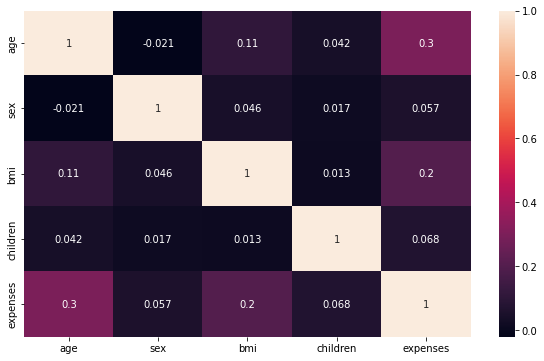

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,robust=True)

In [ ]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
df_gptest = df[['smoker','sex','region','expenses']]

In [ ]:
df_gptest

,smoker,sex,region,expenses
0,yes,0,southwest,16884.92
1,no,1,southeast,1725.55
2,no,1,southeast,4449.46
3,no,1,northwest,21984.47
4,no,1,northwest,3866.86
...,...,...,...,...
1333,no,1,northwest,10600.55
1334,no,0,northeast,2205.98
1335,no,0,southeast,1629.83
1336,no,0,southwest,2007.95


In [ ]:
grouped_test=df_gptest[['smoker', 'expenses']].groupby(['smoker'])
grouped_test.head(2)

,smoker,expenses
0,yes,16884.92
1,no,1725.55
2,no,4449.46
11,yes,27808.73


In [ ]:
grouped_test2=df_gptest[['region', 'expenses']].groupby(['region'])


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('northeast')['expenses'], grouped_test2.get_group('northwest')['expenses'], grouped_test2.get_group('southeast')['expenses'],grouped_test2.get_group('southwest')['expenses'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2.9696265038563223 , P = 0.030893363993447484


In [ ]:
dff['smoker']=dff['smoker'].apply(lambda x:1 if x=='yes' else 0)

In [ ]:
dff['region']=dff['region'].apply(lambda x:1 if x=='southeast' else 0)

In [ ]:
grouped_test2=df_gptest[['sex', 'expenses']].groupby(['sex'])

RIDGE REGRESSION

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Grid = GridSearchCV(RR, parameters ,cv=4)

In [ ]:
Grid = GridSearchCV(RR, parameters ,cv=4)

In [ ]:
pr2=PolynomialFeatures(degree=6)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)

In [ ]:
Grid.fit(x_train_pr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000],
                          'normalize': [True, False]}])

In [ ]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=1, normalize=True)

In [ ]:
RR_train_r2_score = BestRR.score(x_train_pr, y_train)
RR_train_r2_score

0.842266065485015

In [ ]:
RR_r2_score=BestRR.score(x_test_pr, y_test)
RR_r2_score

0.8400609929801638

In [ ]:
rr_pred=BestRR.predict(x_test_pr)

In [ ]:
RR_rmse = np.sqrt(mean_squared_error(y_test,rr_pred))
RR_rmse

4957.480748172923

In [ ]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
Rsqu_test = []

order = [num for num in range(1,10)]
for n in order:
    pr = PolynomialFeatures(degree=n)


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
Y_hat = lr.predict(X_test)

In [ ]:
lr_train_r2_score=lr.score(X_train,y_train)
lr.score(X_train,y_train)

0.748254182995006

In [ ]:
lr_r2_score = r2_score(y_test,Y_hat)
lr_r2_score

0.7516430324044346

In [ ]:
lr_rmse=np.sqrt(mean_squared_error(y_test,Y_hat))
lr_rmse

6177.631701310192

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [ ]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb2 = xgb.XGBRegressor(nthread=-1)

grid = GridSearchCV(xgb2, params)
grid.fit(X_train, y_train)

[13:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(estimator=XGBRegressor(nthread=-1),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_depth': [2, 3, 4],
                         'min_child_weight': [4, 5],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

# ***CALCULATING THE R2 SCORE OF THE XGBOOST REGRESSION MODEL ON TRAINING AND TESTING DATA***

In [ ]:
xgb_train_r2_score = r2_score(y_train, grid.best_estimator_.predict(X_train))
xgb_train_r2_score

0.8814350957180092

In [ ]:
xgb_r2_score = r2_score(y_test, grid.best_estimator_.predict(X_test))
xgb_r2_score

0.8537240756704302

# ***CALCULATING THE ROOT MEAN SQUARE ERROR ON THE TEST SET OF THE XGBOOST REGRESSION MODEL***

In [ ]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,grid.best_estimator_.predict(X_test)))
xgb_rmse

4741.003372194961

# ***NEURAL NETWORK REGRESSION:***




# ***`NORMALISING THE DATA FOR USE BY NEURAL NETWORK`***

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
X_train_norm=min_max_scaler.fit_transform(X_train)


In [ ]:
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
model=Sequential()

In [ ]:
X_train.shape

(936, 5)

# ***`CREATING THE NETWORK BY ADDING 4 LAYERS OF 4 NEURONS EACH AND RECTIFIED LINEAR UNIT AS THE ACTIVATION FUNCTION`***

In [ ]:
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

# ***`FITTING THE MODEL WITH THE NORMALISED TRAINING DATA, TRAINING FOR 5000 EPOCHS`***

In [ ]:
model.fit(x=X_train_norm, y=y_train, validation_data=(X_test_norm,y_test), batch_size=128,epochs=5000)

Streaming output truncated to the last 5000 lines.
8/8 [==============================] - 0s 14ms/step - loss: 32622578.0000 - val_loss: 33810624.0000
Epoch 2502/5000
8/8 [==============================] - 0s 14ms/step - loss: 32631606.0000 - val_loss: 33770668.0000
Epoch 2503/5000
8/8 [==============================] - 0s 14ms/step - loss: 32598878.0000 - val_loss: 33772076.0000
Epoch 2504/5000
8/8 [==============================] - 0s 13ms/step - loss: 32589070.0000 - val_loss: 33769468.0000
Epoch 2505/5000
8/8 [==============================] - 0s 12ms/step - loss: 32594632.0000 - val_loss: 33785004.0000
Epoch 2506/5000
8/8 [==============================] - 0s 15ms/step - loss: 32573282.0000 - val_loss: 33777220.0000
Epoch 2507/5000
8/8 [==============================] - 0s 15ms/step - loss: 32565292.0000 - val_loss: 33771536.0000
Epoch 2508/5000
8/8 [==============================] - 0s 13ms/step - loss: 32555130.0000 - val_loss: 33762580.0000
Epoch 2509/5000
8/8 [================

In [ ]:
losses=pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,314229216.0,342244768.0
1,314228704.0,342244160.0
2,314228064.0,342243488.0
3,314227456.0,342242848.0
4,314226816.0,342242112.0
...,...,...
4995,22008156.0,24814730.0
4996,22003872.0,24825844.0
4997,22004444.0,24819850.0
4998,22005058.0,24845526.0


# ***`
PLOTTING THE TRAINING SET AND TESTING LOSS AS A FUNCTION OF THE NUMBER OF EPOCHS`***

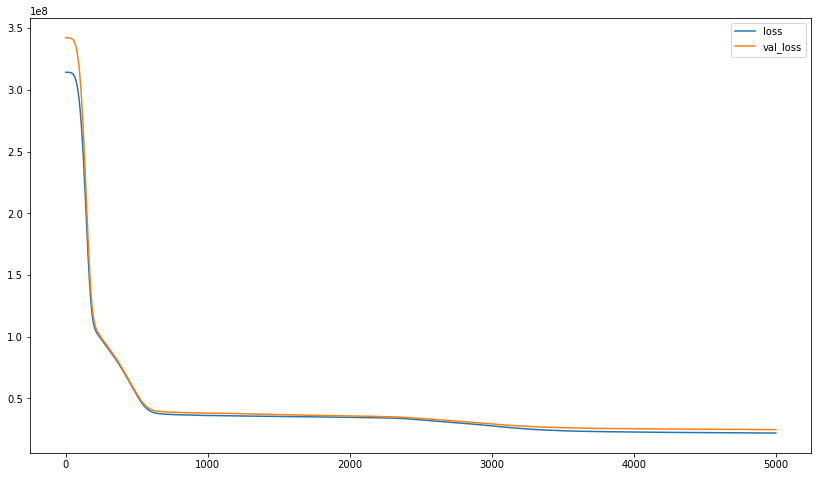

In [ ]:
losses.plot(figsize=(14,8))

In [ ]:
nn_pred = model.predict(X_test_norm)

In [ ]:
nn_train_r2_score = r2_score(y_train,model.predict(X_train_norm))
nn_train_r2_score

0.8465451898482231

In [ ]:
nn_r2_score = r2_score(y_test,nn_pred)
nn_r2_score

0.8383268298646037

In [ ]:
nn_rmse = np.sqrt(mean_squared_error(y_test,nn_pred))
nn_rmse

4984.284409512607

In [ ]:
print("                                         EVALUATION OF THE 4 MODELS:")
print()
print()
print("LINEAR REGRESSION:")
print()
print("r2_score on training data: "+str(lr_train_r2_score))
print("r2_score on test set: "+str(lr_r2_score))
print("root mean square error on test set: "+str(lr_rmse))
print()
print("---------------------------------------------------------------")
print()
print()
print("RIDGE REGRESSION:")
print()
print("r2_score on training data: "+str(RR_train_r2_score))
print("r2_score on test set: "+str(RR_r2_score))
print("root mean square error on test set: "+str(RR_rmse))
print()
print()
print("---------------------------------------------------------------")
print()
print("XGBOOST REGRESSION:")
print()
print("r2_score on training data: "+str(xgb_train_r2_score))
print("r2_score on test set: "+str(xgb_r2_score))
print("root mean square error on test set: "+str(xgb_rmse))
print()
print()
print("---------------------------------------------------------------")
print()
print("NEURAL NETWORK REGRESSION:")
print()
print("r2_score on training data: "+str(nn_train_r2_score))
print("r2_score on test set: "+str(nn_r2_score))
print("root mean square error on test set: "+str(nn_rmse))
print()

                                         EVALUATION OF THE 4 MODELS:


LINEAR REGRESSION:

r2_score on training data: 0.748254182995006
r2_score on test set: 0.7516430324044346
root mean square error on test set: 6177.631701310192

---------------------------------------------------------------


RIDGE REGRESSION:

r2_score on training data: 0.842266065485015
r2_score on test set: 0.8400609929801638
root mean square error on test set: 4957.480748172923


---------------------------------------------------------------

XGBOOST REGRESSION:

r2_score on training data: 0.8814350957180092
r2_score on test set: 0.8537240756704302
root mean square error on test set: 4741.003372194961


---------------------------------------------------------------

NEURAL NETWORK REGRESSION:

r2_score on training data: 0.8465451898482231
r2_score on test set: 0.8383268298646037
root mean square error on test set: 4984.284409512607

